## Students' stress levels EDA
This notebook has the purpose to put in practice some of the EDA skills gained in the first section of IBM Machine Learning Certificate course.

### Introduction to the datatset
The chosen dataset for this project is the 'Student Stress Factors' dataset available on Kaggle at the following link: 'https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis'.

The aim is to perform a comprehensive EDA and gain some insights as one would do before applying any ML modeling tool. The dataset is available under "Apache 2.0 License" and so it is free to use for any purpose.
The dataset contains 1100 records of students' assessed strees levels, together with 20 other features:
- anxiety level
- self-esteem
- mental heath
- depression
- blood pressure
- headache
- sleep quality
- breathing problems
- noise levels
- living conditions
- safety
- basic needs
- academic performance
- study load
- teacher-student realationship
- future career concerns
- social support
- peer pressure
- extracurricular activities
- bullying

For each of the prresented features, here are the corresponding ranges and collecttion methodology (source: "https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/discussion/451616"):
1) Anxiety level : range from 0 to 21, Measure : GAD-7
2) Self-esteem : range 0 to 30, Measure: Rosenberg Self Esteem Scale
3) Mental Health History : 0 if no mental health history, 1 if mental health history
4) Depression : range 0 to 27, Measure: Patient Health Questionnaire (PHQ-9)
5) Other features mostly range from 0 to 5 considering 0,1 to be low, 2,3 to be mid, and 4,5 to be high.

The target variable, "stress level" can take values 0, 1 and 2. Meaning no stress, moderate stress and high stress respectively.

### Data loading
We load data from the dataset's .csv file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_name = 'StressLevelDataset.csv'
with open(file_name,'r') as file:
    data = pd.read_csv(file)

In [3]:
with pd.option_context('display.max_rows',None,'display.max_columns',None,'display.precision',3):
    display(data.head(5))

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1


## Data exploration

The steps in our data exploration will be:
1. Undestanding of dataset dimension, features types and basic information.
2. Handling of possible missing data, duplicates, outliers. Is data clean? Can we improve its quality?
3. Checking variables' distributions. Should we apply some methods for feature transformation to some of the analysed features?
4. Insights. Which plots and statistics can wee use to gain some insights about our data?
5. Hypothesis testing.
6. Features selection. Which are the best features to use to predict a student's stress level?
7. Next steps.

### 1) Undestanding of dataset dimension, features types and basic information.

In [4]:
with pd.option_context('display.max_rows',None,'display.max_columns',None,'display.precision',3):
    display(data.describe())


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000
mean,11.064,17.777,0.493,12.555,2.508,2.182,2.660,2.754,2.649,2.518,2.737,2.773,2.773,2.622,2.648,2.649,1.882,2.735,2.767,2.617,0.996
std,6.118,8.945,0.500,7.727,1.409,0.834,1.548,1.401,1.328,1.119,1.406,1.434,1.415,1.316,1.385,1.529,1.048,1.425,1.418,1.531,0.822
min,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,6.000,11.000,0.000,6.000,1.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,1.000,2.000,2.000,1.000,0.000
50%,11.000,19.000,0.000,12.000,3.000,2.000,2.500,3.000,3.000,2.000,2.000,3.000,2.000,2.000,2.000,2.000,2.000,2.000,2.500,3.000,1.000
75%,16.000,26.000,1.000,19.000,3.000,3.000,4.000,4.000,3.000,3.000,4.000,4.000,4.000,3.000,4.000,4.000,3.000,4.000,4.000,4.000,2.000
max,21.000,30.000,1.000,27.000,5.000,3.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,3.000,5.000,5.000,5.000,2.000


In [5]:
data.shape

(1100, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

Coherently with the dateset description, we find 21 columns, each being of integer type and with non-null values. The author of the dataset already made sure that no missing values were reported in the dataset for each of the 1100 rows reported.

### 2) Handling of possible missing data, duplicates, outliers. Is data clean? Can we improve its quality?

Checking for missing values...

In [7]:
data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

As already stated, we have no missing values. This is quite rare in this kind of surveys so we can suppose the author already performed some data cleaning activities...

Supposing there were missing values for some of the records, how could have we managed them? In this kind of survey, where all values are integer numbers we couldn't have replaced missing values with the mean. A method could have been replacing missing data with the more frequent value for features ranging up to 5. For higher range features like "self-esteem" or "anxiety-level" also the median could have been a good replacement.

Checking for duplicate values...

In [8]:
data.index.is_unique

True

We have no duplicate values

Checking for outliers in the higher range features...

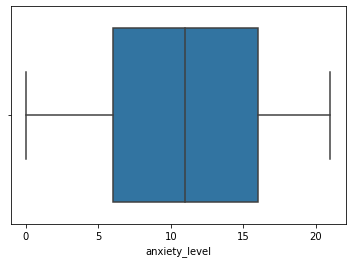

In [9]:
sns.boxplot(data=data, x='anxiety_level')
plt.show()

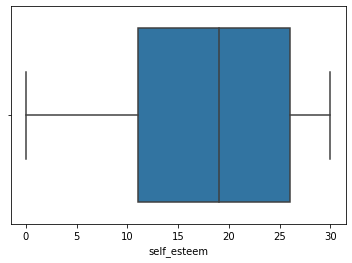

In [10]:
sns.boxplot(data=data, x='self_esteem')
plt.show()

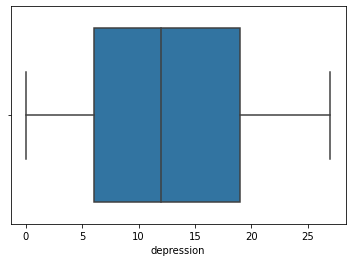

In [11]:
sns.boxplot(data=data, x='depression')
plt.show()

We can state that no outliers are present in our dataset.

To conclude this part of the anlysis we can say that the dataset presented is already clean and and can be readily used to gain some insights.

### 3) Checking variables' distributions. Should we apply some methods for feature transformation to some of the analysed features?

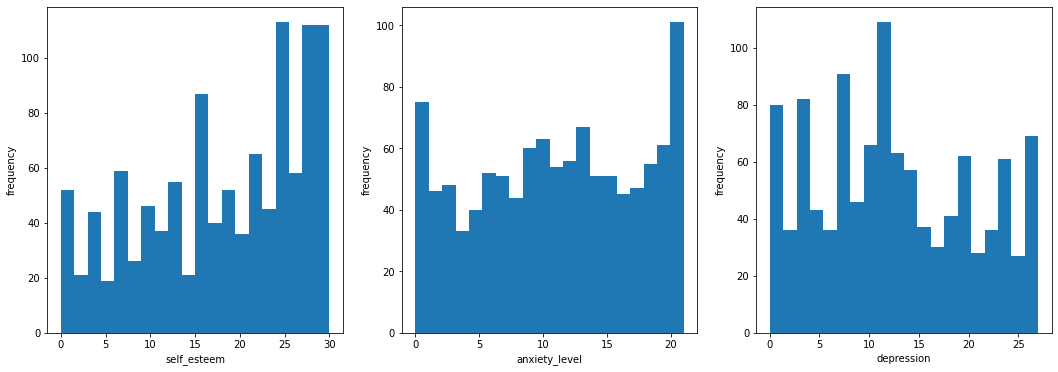

In [12]:
checked_data = data[['self_esteem','anxiety_level','depression']]

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(18, 6),sharey=False)
for i, ax in enumerate(axs):
    ax.hist(x=checked_data.iloc[:,i],bins=20)
    ax.set_xlabel(checked_data.columns[i])
    ax.set_ylabel('frequency')

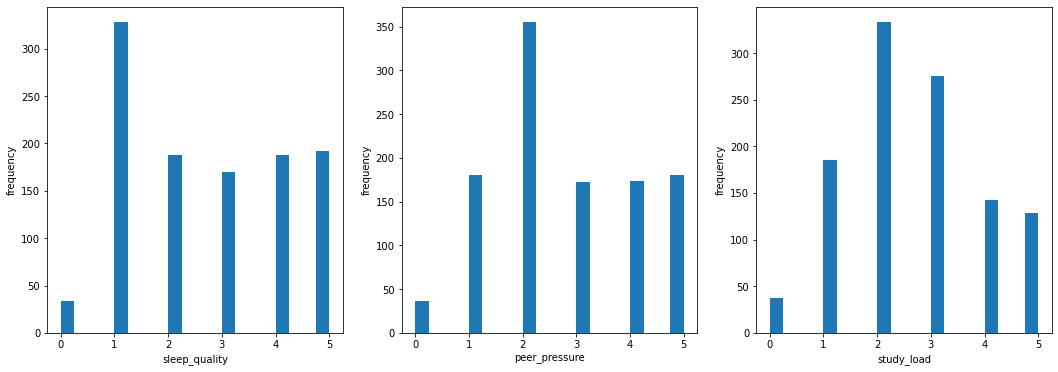

In [13]:
checked_data = data[['sleep_quality','peer_pressure','study_load']]

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(18, 6),sharey=False)
for i, ax in enumerate(axs):
    ax.hist(x=checked_data.iloc[:,i],bins=20)
    ax.set_xlabel(checked_data.columns[i])
    ax.set_ylabel('frequency')

From these visualizations we can understand already that not all the variables are perfectly normally distributed around their mean. Let's analyze their skewness...

In [14]:
#we first drop the "metal_health_history" feature because it is a binary variable
skew_data = data.drop('mental_health_history', axis =1)

#skewness computation
skew_vals = skew_data.skew()
# Showing the skewed columns
skew_cols = (skew_vals.sort_values(ascending=False).to_frame().rename(columns={0:'Skew'}))

skew_cols

,Skew
headache,0.270494
study_load,0.228964
depression,0.216638
noise_level,0.207122
future_career_concerns,0.204276
teacher_student_relationship,0.198016
peer_pressure,0.194719
safety,0.188097
academic_performance,0.184316
sleep_quality,0.177975


The skewness values however falls into the acceptable (-0.5; 0.5) range so we can assume a normal distibution for all of the features. No further transformation is needed.

### 4) Insights. Which plots and statistics can wee use to gain some insights about our data?



First, let's check the average values for each of the features to catch the average feeling of surveyed students.

In [15]:
mean_data = data.mean().sort_values()
mean_data

mental_health_history            0.492727
stress_level                     0.996364
social_support                   1.881818
blood_pressure                   2.181818
headache                         2.508182
living_conditions                2.518182
bullying                         2.617273
study_load                       2.621818
teacher_student_relationship     2.648182
future_career_concerns           2.649091
noise_level                      2.649091
sleep_quality                    2.660000
peer_pressure                    2.734545
safety                           2.737273
breathing_problem                2.753636
extracurricular_activities       2.767273
basic_needs                      2.772727
academic_performance             2.772727
anxiety_level                   11.063636
depression                      12.555455
self_esteem                     17.777273
dtype: float64

We can state that, on average students are experiencing a moderate stress level. Moreover, among the 0 to 5 scale freatures, social suppport is the lowest. This could be saying that, on average, students feel that more could be done to improve their general well-being by increasing social support. For future research, it could be interesting to study whether the schools of the surveyed students offer a free psycological support to their students.

Let's investigate more some relationships betweeen data, for example how are axiety levels distributed among the different academic_performance levels?

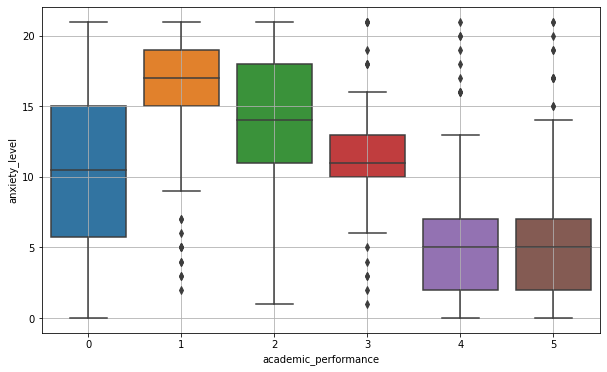

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='academic_performance', y='anxiety_level')
plt.grid()
plt.show()

It would seem that, as expected, average anxiety levels decrease with the increase of the academic performance, but they stay around the average when they are very poor (academic_performance = 0). 

Hypothesis 1: The average anxiety level of students with strong academic performance (i.e. 4 or 5) is the same.

$ 𝐻_{0}:\mu_{4} = \mu_{5} $ The average anxiety levels are the same for students with strong and very strong academic performace. \
$ 𝐻_{A}:\mu_{4} \ne \mu_{5} $ The average anxiety levels are NOT the same for students with strong and very strong academic performace.

Let's see how the above features are related to stress levels.

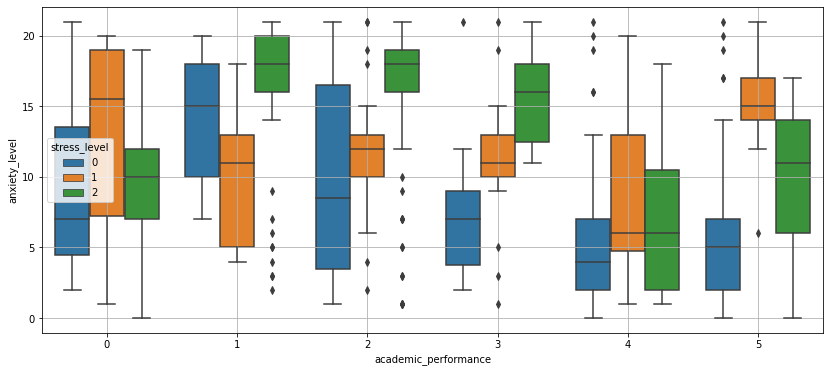

In [17]:
plt.figure(figsize=(14,6))
sns.boxplot(data=data, x='academic_performance', y='anxiety_level', hue='stress_level')
plt.grid()
plt.show()

Hypothesis 2: The average anxiety level of students with academic_performance = 4 does not depend on the stress level.

$ 𝐻_{0}:\mu_{1}=\mu_{2}=\mu_{3} $ The mean anxiety level of student with academic_performance = 4 with no stress, moderate stress, and high stress are the same. \
$ 𝐻_{A}: $ At least one of the means is not the same.

Now we want to know how the proportion of students with mental health history is distributed among the academic performance levels. To do this, we'll need a pivot table (contingency table) of the two variables.

In [18]:
pivot = pd.crosstab(data['academic_performance'],data['mental_health_history'])
pivot

mental_health_history,0,1
academic_performance,,
0,17,11
1,13,172
2,105,243
3,82,87
4,171,17
5,170,12


<AxesSubplot:xlabel='academic_performance'>

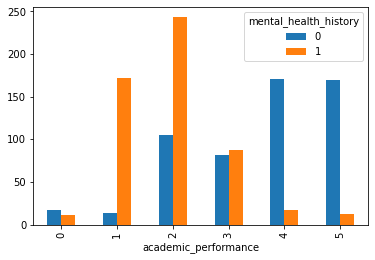

In [19]:
pivot.plot(kind='bar')

Hypothesis 3: The proportion of students with mental health history is not the same among the different academic performace categories.

$ 𝐻_{0} $: Students with mental health history proportions are significantly different across the different academic performace categories. \
$ 𝐻_{A} $: Students with mental health history proportions are NOT significantly different across the different academic performace categories.

A pivot table can also be used to create a heatmap of how self-esteem and anxiety levels are related.

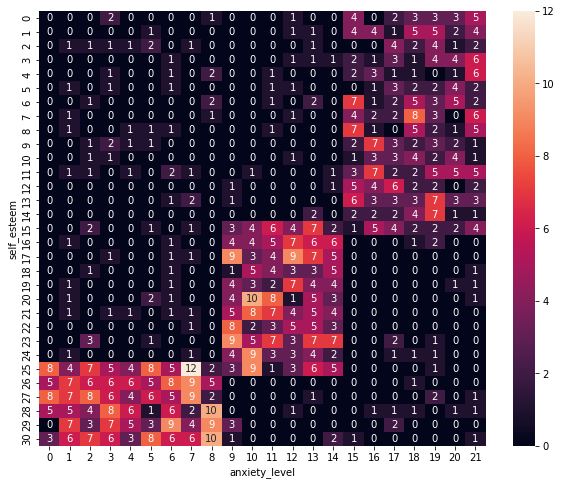

In [20]:
pivot_2 = pd.crosstab(data['self_esteem'],data['anxiety_level'])
plt.figure(figsize=(10,8))
sns.heatmap(pivot_2,annot=True)
plt.show()

As expected a negative correration can be found among anxiety levels and self-esteem.

Then, we could try and understand which variables have higher correlation with our target variable that is "stress_level"

In [21]:
features = data.corr()['stress_level'].sort_values()
features

self_esteem                    -0.756195
sleep_quality                  -0.749068
academic_performance           -0.720922
safety                         -0.709602
basic_needs                    -0.708968
teacher_student_relationship   -0.680163
social_support                 -0.632497
living_conditions              -0.581723
blood_pressure                  0.394200
breathing_problem               0.573984
study_load                      0.634156
mental_health_history           0.648644
noise_level                     0.663371
peer_pressure                   0.690684
extracurricular_activities      0.692977
headache                        0.713484
depression                      0.734379
anxiety_level                   0.736795
future_career_concerns          0.742619
bullying                        0.751162
stress_level                    1.000000
Name: stress_level, dtype: float64

### 5) Hypothesis testing

For the purpose of this notebook we choose to test hypothesis 1.

Hypothesis 1: The average anxiety level of students with strong and very strong academic performance (i.e. 4 or 5) is the same.

$ 𝐻_{0}:\mu_{4} = \mu_{5} $ The average anxiety levels are the same for students with strong and very strong academic performace. \
$ 𝐻_{A}:\mu_{4} \ne \mu_{5} $ The average anxiety levels are the NOT the same for students with strong and very strong academic performace.

In this test we have to look at the distibutions of anxiety levels among the two examined performance levels.

In [22]:
ac_perf = data[(data['academic_performance']==4) | (data['academic_performance']==5)]
ac_perf = ac_perf[['academic_performance','anxiety_level']]

/Users/jacopoferreri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jacopoferreri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


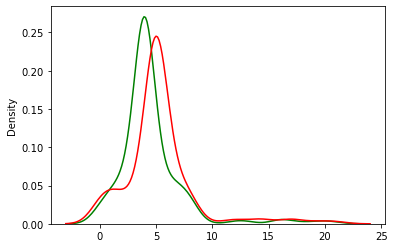

In [23]:
sns.distplot(ac_perf[ac_perf['academic_performance']==4],color='green',hist=False)
sns.distplot(ac_perf[ac_perf['academic_performance']==5],color='red',hist=False)
plt.show()

Next we calculate the average values for the two categories.

In [24]:
mean_4 = ac_perf[ac_perf['academic_performance']==4].anxiety_level.mean()
mean_5 = ac_perf[ac_perf['academic_performance']==5].anxiety_level.mean()
print(mean_4)
print(mean_5)

5.090425531914893
5.587912087912088


Let's isolate the values of interest

In [25]:
anx_lev_4 = ac_perf[ac_perf['academic_performance']==4].anxiety_level.values
anx_lev_5 = ac_perf[ac_perf['academic_performance']==5].anxiety_level.values
print(len(anx_lev_4))
print(len(anx_lev_5))

188
182


Since we have two populations > 30 and we're trying to test an hypothesis regarding the mean we need to use a Z-score test.\
We use alpha = 0.05

In [26]:
from statsmodels.stats.weightstats import ztest
z_stat, p_value = ztest(anx_lev_4, anx_lev_5, value=0)   #value = 0 means we're testing the same-mean hypothesis
print("t_stat = ", z_stat, ", p_value = ", p_value)

t_stat =  -1.1043829258869398 , p_value =  0.26942706414692186


Since p-value is 0.27 > alpha then we fail to reject the null hypothesis and so the populations means can be the same

### 6) Features selection. Which are the best features to use to predict a student's stress level?

To simplify the dataset we can narrow down the features set by selecting just the ones that have a correlation score > 0.7 or < -0.7

In [27]:
simpler_data = data[['self_esteem','sleep_quality','academic_performance','safety','basic_needs','headache','depression','anxiety_level','future_career_concerns','bullying','stress_level']]
simpler_data

,self_esteem,sleep_quality,academic_performance,safety,basic_needs,headache,depression,anxiety_level,future_career_concerns,bullying,stress_level
0,20,2,3,3,2,2,11,14,3,2,1
1,8,1,1,2,2,5,15,15,5,5,2
2,18,2,2,3,2,2,14,12,2,2,1
3,12,1,2,2,2,4,15,16,4,5,2
4,28,5,4,4,3,2,7,16,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...
1095,17,3,2,2,3,3,14,11,3,3,1
1096,12,0,0,3,4,0,8,9,1,3,2
1097,26,5,5,4,4,1,3,4,1,1,0
1098,0,1,2,1,1,5,19,21,4,4,2


Now let's plot an heatmap of the new dataset to also show correlation between variables

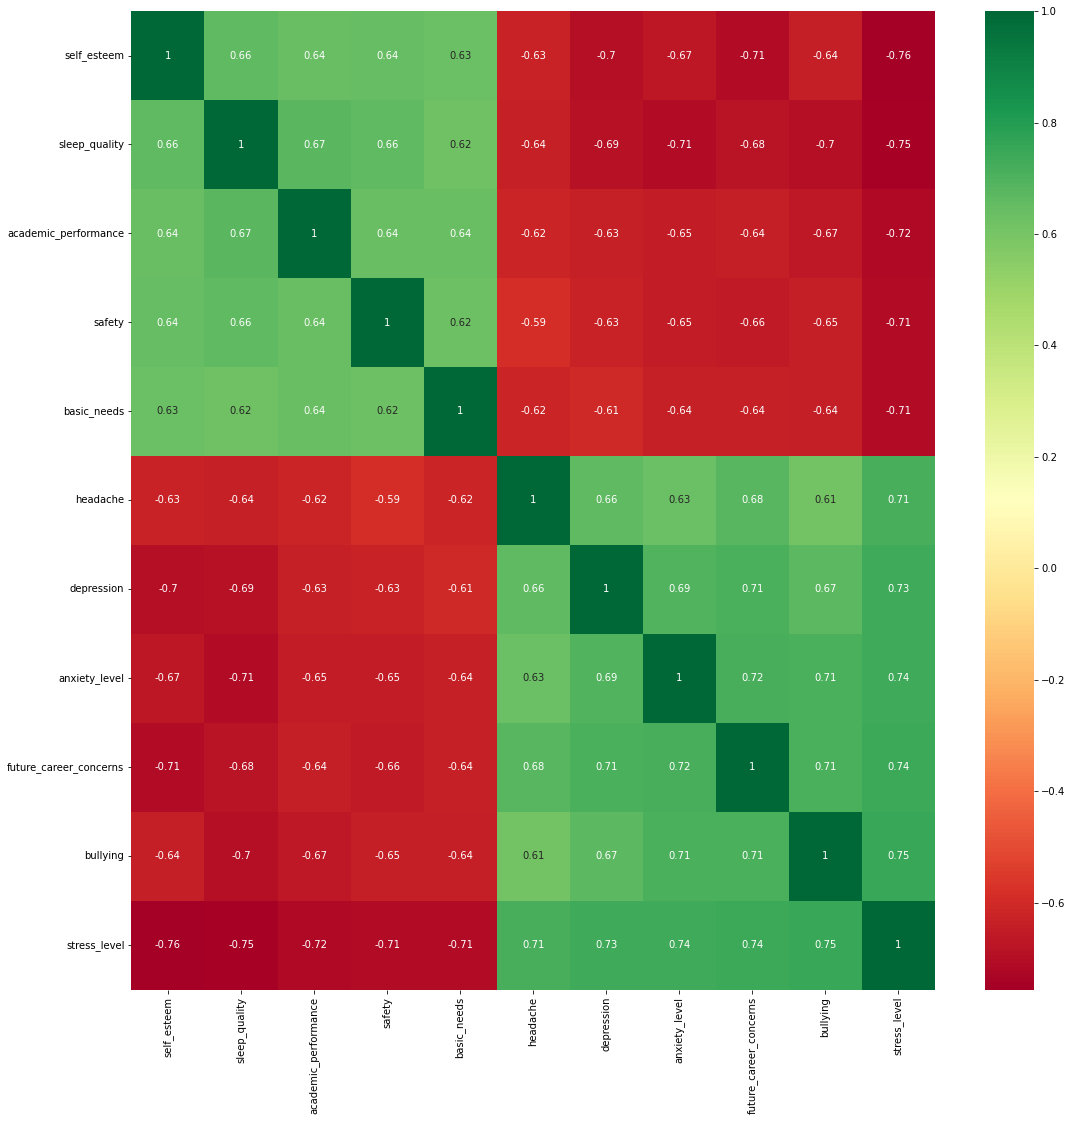

In [28]:
plt.figure(figsize=(18,18))
sns.heatmap(simpler_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

### 7) Next steps

In the next steps we could undertake a PCA analysis to reduce dimensionality. Once we know what variables to use, a proper scaling should be done. This could be useful for a future ML model developement aimed at predicting stress level among students.\
For future research it could also be useful to survey other health related attributes like for example the diet quality and the BMI. While on the social side it could be interesting to survey some more family-related attributes, like for example parents divorced YES/NO and family income.